# EDA

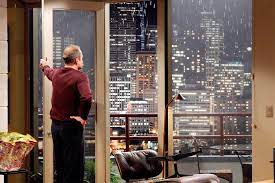

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_eda = pd.read_csv("data/joined_df.csv", sep = ",", index_col=False)

In [4]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

HYPOTHESIS BASED ON CLIENT

Client: Nicole Johnson
She is a Buyer
She wants: Lively, central neighborhood, middle price range, right timing (within a year)

information we have on the data:
- King County Housing Data: information about home sales in King County (USA)
task:
- at least 3 insights, one geographical
- at least 3 recommendations for client


Hypothesis for Nicole Johnson:
1. House prices increase the closer they get to lively and central neighbourhoods in King County.
2. Houses in the middle price range in central areas have a higher average 'grade' and 'condition' score compared to similarly priced houses in less central locations.
3. The best time to buy a house within a year is winter, due lower competition and prices

How do I want to answer the question:

1.
- which zip codes are in lively/central neighborhoods. filter for Zip codes.
- make groups based on zip codes, if they are lively or not

2.
- look at price range of all houses
- what is the middle price range? 
- filter for middle priced houses in central areas. Make average grade and condition score of these central areas. 

3.
- make an overview of the months and then show the prices for each month


DATA EXPLORATION/CLEANING

In [5]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [6]:
df_eda.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df_eda.drop(["id.1"], axis=1, inplace=True)

In [8]:
df_eda.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [9]:
#check for duplicates in rows
df_eda["house_id"].duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

Some houses were sold multiple times

In [10]:
#transform data type date
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y-%m-%d')

In [11]:
#extract sold month
df_eda["month_sold"]=df_eda["date"].dt.month

In [12]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   sqft_lot       21597 non-null  float64       
 8   floors         21597 non-null  float64       
 9   waterfront     19206 non-null  float64       
 10  view           21534 non-null  float64       
 11  condition      21597 non-null  int64         
 12  grade          21597 non-null  int64         
 13  sqft_above     21597 non-null  float64       
 14  sqft_basement  21145 non-null  float64       
 15  yr_built       2159

In [13]:
#look for missing data
df_eda.isna().sum()

date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month_sold          0
dtype: int64

In [14]:
#change length of decimals to 2
pd.options.display.float_format = "{:,.2f}".format

Folium or Visualization Map

In [64]:
import folium
import numpy as np
map_zipcode = df_eda.groupby('zipcode')[['lat','long', 'price']].mean()
map_zipcode['price'] = map_zipcode['price'].astype(int)
# Calculate the center of the map (average lat/lon)
center_lat = map_zipcode['lat'].mean()
center_lon = map_zipcode['long'].mean()
# Create the map centered at the calculated coordinates
m3 = folium.Map(location=[center_lat, center_lon], zoom_start=12)
# Loop through each row to add a marker for each zipcode with mean sale price as label
for _, row in map_zipcode.iterrows():
    # Format the price as an integer
    price = row['price']
    # Create a subtle grey circle marker
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=6,  # Size of the circle
        color='gray',  # Circle border color (grey)
        fill=True,  # Fill the circle
        fill_color='gray',  # Fill color (grey)
        fill_opacity=0.6,  # Transparency of the marker
    ).add_to(m3)
    # Create a permanent label
    folium.Marker(
            location=[row['lat'], row['long']],
            icon=folium.DivIcon(html=f'''
                <div style="font-size: 14px; color: black; font-weight: bold;
                    position: absolute; left: 8px; top: -18px;">
                    {price}0&nbsp$
                </div>
            '''),
            popup=None  # No popup required
        ).add_to(m3)
# Save the map to a HTML file
m3.save("zipcode_price_map.html")
# Display the map (if in Jupyter notebook)
m3

Testing Hypothesis
1. House prices are higher in lively and central neighborhoods in King County compared to less lively neighborhoods.

- https://www.niche.com/places-to-live/search/best-neighborhoods/c/king-county-wa/?bars=careALot&coffeeShops=careALot&parks=careALot&restaurants=careALot 
- looked for vibrant areas and which zip code they have:
    - vibrant areas are areas with social scene, dining options, nightlife, central
    - less lively, or more suborban: 
        family-oriented and quiet, suburban
- sorted my data based on ip codes


Seattle Urban Core, seattle center (Most Lively):
98102, 98103, 98105, 98107, 98109, 98112, 98115, 98119, 98122

Seattle Residential (Urban but more residential). Houses are close to downtown Seattle. More quiet and family friendly than downtown areas. more lively than east side, as it is closer to downtown of seattle, more diverse, better nightlife options, higher population. University District is part of Seattle Residential.:
98106, 98108, 98116, 98117, 98118, 98125, 98126, 98133, 98136, 98144, 98155, 98177, 98178, 98199

East Side Urban/Suburban Mix (mix combines elements of both urban living like jobs, amenities and suburban life, like housing, and family oriented communities):
98004, 98005, 98006, 98007, 98008, 98011, 98027, 98028, 98029, 98033, 98034, 98052, 98074, 98075

South King County (Generally less lively, more suburban):
98001, 98002, 98003, 98023, 98030, 98031, 98032, 98038, 98042, 98055, 98056, 98058, 98059, 98092, 98146, 98148, 98166, 98168, 98178, 98188, 98198

Far East/Rural Areas:
98010, 98014, 98019, 98022, 98024, 98045, 98053, 98065, 98072, 98077

Unique/Isolated Areas:
98040 (Mercer Island)
98070 (Vashon Island)
98039 (Medina - small, wealthy enclave)


lively ar




In [17]:
unique_zipcodes = df_eda['zipcode'].unique()

In [18]:
unique_zipcodes

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

Make a new Column for Livelyness

In [19]:
print(df_eda['zipcode'].dtype)

int64


In [65]:
def categorize_zipcode(zipcode):
    if zipcode in ['98102', '98103', '98105', '98107', '98109', '98112', '98115', '98119', '98122']:
        return 'Seattle Center'
    elif zipcode in ['98106', '98108', '98116', '98117', '98118', '98125', '98126', '98133', '98136', '98144', '98155', '98177', '98178', '98199']:
        return 'Seattle Residential'
    elif zipcode in ['98004', '98005', '98006', '98007', '98008', '98011', '98027', '98028', '98029', '98033', '98034', '98052', '98074', '98075']:
        return 'East Side'
    elif zipcode in ['98001', '98002', '98003', '98023', '98030', '98031', '98032', '98038', '98042', '98055', '98056', '98058', '98059', '98092', '98146', '98148', '98166', '98168', '98178', '98188', '98198']:
        return 'South King County'
    elif zipcode in ['98010', '98014', '98019', '98022', '98024', '98045', '98053', '98065', '98072', '98077']:
        return 'Far East/Rural'
    elif zipcode in ['98040', '98070', '98039']:
        return 'Unique/Isolated'
    else:
        return 'Other'

df_eda['livelyness'] = df_eda['zipcode'].astype(str).apply(categorize_zipcode)

In [66]:
df_eda.head(10)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,livelyness
0,2014-10-13,"221,900.00",7129300520,1,3.00,1.00,"1,180.00","5,650.00",1.00,NaN,...,0.00,1955,0.00,98178,47.51,-122.26,"1,340.00","5,650.00",10,Seattle Residential
1,2014-12-09,"538,000.00",6414100192,2,3.00,2.25,"2,570.00","7,242.00",2.00,0.00,...,400.00,1951,"19,910.00",98125,47.72,-122.32,"1,690.00","7,639.00",12,Seattle Residential
2,2015-02-25,"180,000.00",5631500400,3,2.00,1.00,770.00,"10,000.00",1.00,0.00,...,0.00,1933,NaN,98028,47.74,-122.23,"2,720.00","8,062.00",2,East Side
3,2014-12-09,"604,000.00",2487200875,4,4.00,3.00,"1,960.00","5,000.00",1.00,0.00,...,910.00,1965,0.00,98136,47.52,-122.39,"1,360.00","5,000.00",12,Seattle Residential
4,2015-02-18,"510,000.00",1954400510,5,3.00,2.00,"1,680.00","8,080.00",1.00,0.00,...,0.00,1987,0.00,98074,47.62,-122.05,"1,800.00","7,503.00",2,East Side
5,2014-05-12,"1,230,000.00",7237550310,6,4.00,4.50,"5,420.00","101,930.00",1.00,0.00,...,"1,530.00",2001,0.00,98053,47.66,-122.00,"4,760.00","101,930.00",5,Far East/Rural
6,2014-06-27,"257,500.00",1321400060,7,3.00,2.25,"1,715.00","6,819.00",2.00,0.00,...,NaN,1995,0.00,98003,47.31,-122.33,"2,238.00","6,819.00",6,South King County
7,2015-01-15,"291,850.00",2008000270,8,3.00,1.50,"1,060.00","9,711.00",1.00,0.00,...,0.00,1963,0.00,98198,47.41,-122.31,"1,650.00","9,711.00",1,South King County
8,2015-04-15,"229,500.00",2414600126,9,3.00,1.00,"1,780.00","7,470.00",1.00,0.00,...,730.00,1960,0.00,98146,47.51,-122.34,"1,780.00","8,113.00",4,South King County
9,2015-03-12,"323,000.00",3793500160,10,3.00,2.50,"1,890.00","6,560.00",2.00,0.00,...,0.00,2003,0.00,98038,47.37,-122.03,"2,390.00","7,570.00",3,South King County


In [67]:
df_eda[['price']].describe()

,price
count,"21,597.00"
mean,"540,296.57"
std,"367,368.14"
min,"78,000.00"
25%,"322,000.00"
50%,"450,000.00"
75%,"645,000.00"
max,"7,700,000.00"


now i want to group by livelyness and then find the information on the price

In [68]:
df_eda.groupby('livelyness')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
livelyness,,,,,,,,
East Side,"4,969.00","710,371.01","410,877.90","90,000.00","475,000.00","610,000.00","800,000.00","7,060,000.00"
Far East/Rural,"2,129.00","527,949.68","253,122.86","80,000.00","350,000.00","476,000.00","640,000.00","2,280,000.00"
Seattle Center,"2,636.00","717,031.41","409,151.26","169,317.00","489,750.00","610,000.00","799,000.00","7,700,000.00"
Seattle Residential,"5,053.00","491,735.92","280,219.82","90,000.00","335,000.00","425,000.00","568,000.00","4,500,000.00"
South King County,"6,361.00","336,084.45","163,688.05","78,000.00","245,000.00","300,000.00","379,600.00","3,000,000.00"
Unique/Isolated,449.00,"1,118,657.15","787,105.29","160,000.00","645,000.00","905,000.00","1,380,000.00","6,890,000.00"


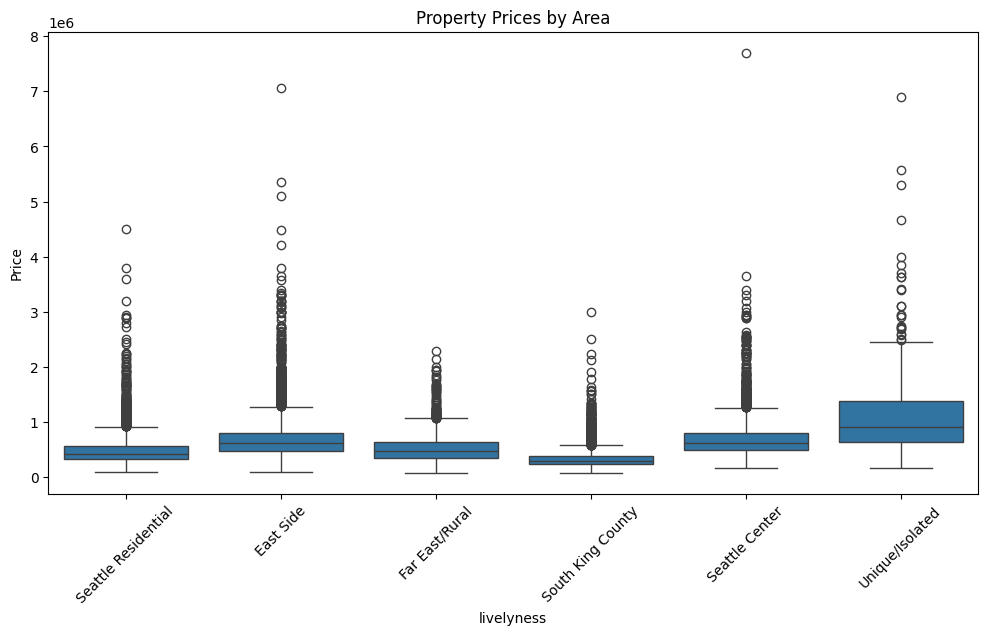

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='livelyness', y='price', data=df_eda)
plt.title('Property Prices by Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Group by 'livelyness' to calculate mean and standard deviation of 'price'
livelyness_stats = df_eda.groupby('livelyness')['price'].agg(['mean', 'std']).reset_index()
livelyness_stats.sort_values(by='mean', ascending=False, inplace=True)


livelyness_stats


,livelyness,mean,std
5,Unique/Isolated,"1,118,657.15","787,105.29"
2,Seattle Center,"717,031.41","409,151.26"
0,East Side,"710,371.01","410,877.90"
1,Far East/Rural,"527,949.68","253,122.86"
3,Seattle Residential,"491,735.92","280,219.82"
4,South King County,"336,084.45","163,688.05"


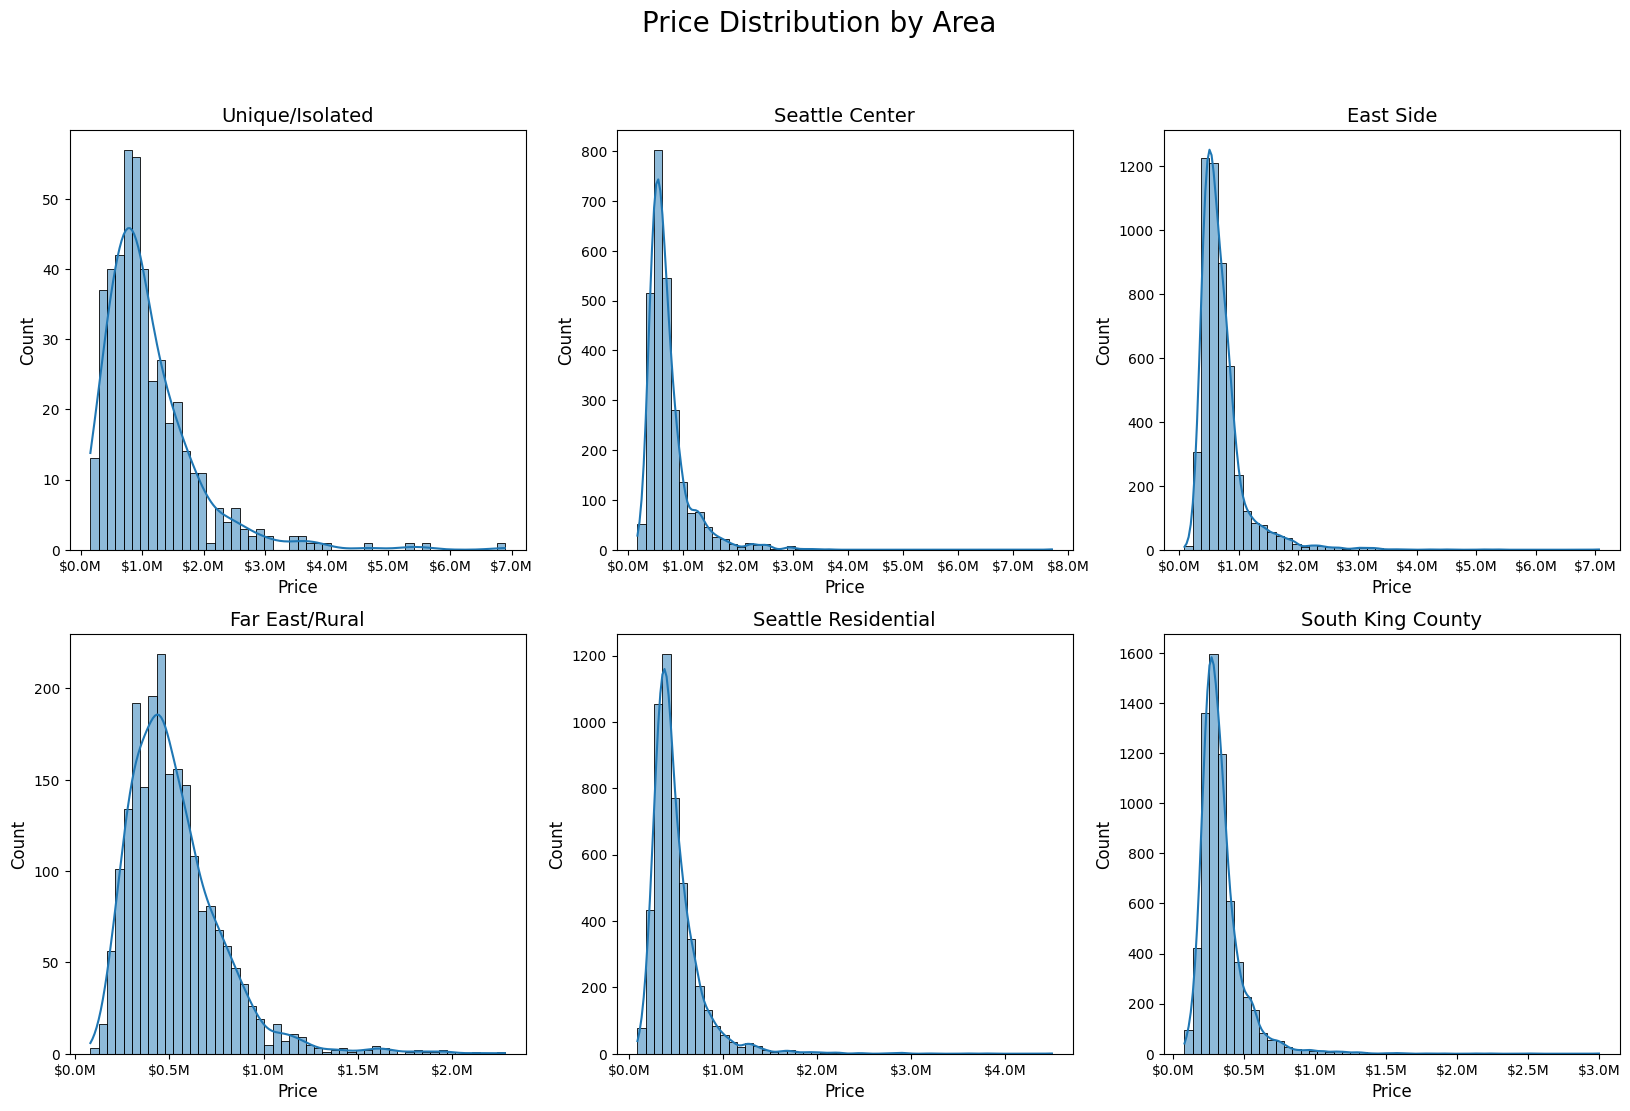

In [72]:
# Define the livelyness categories
categories = ['Unique/Isolated', 'Seattle Center', 'East Side', 'Far East/Rural', 'Seattle Residential', 'South King County']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Price Distribution by Area', fontsize=20)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a histogram for each category
for i, category in enumerate(categories):
    data = df_eda[df_eda['livelyness'] == category]['price']
    sns.histplot(data, ax=axes[i], kde=True, bins=50)
    axes[i].set_title(category, fontsize=14)
    axes[i].set_xlabel('Price', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)

    # Format x-axis labels to show prices in millions
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))




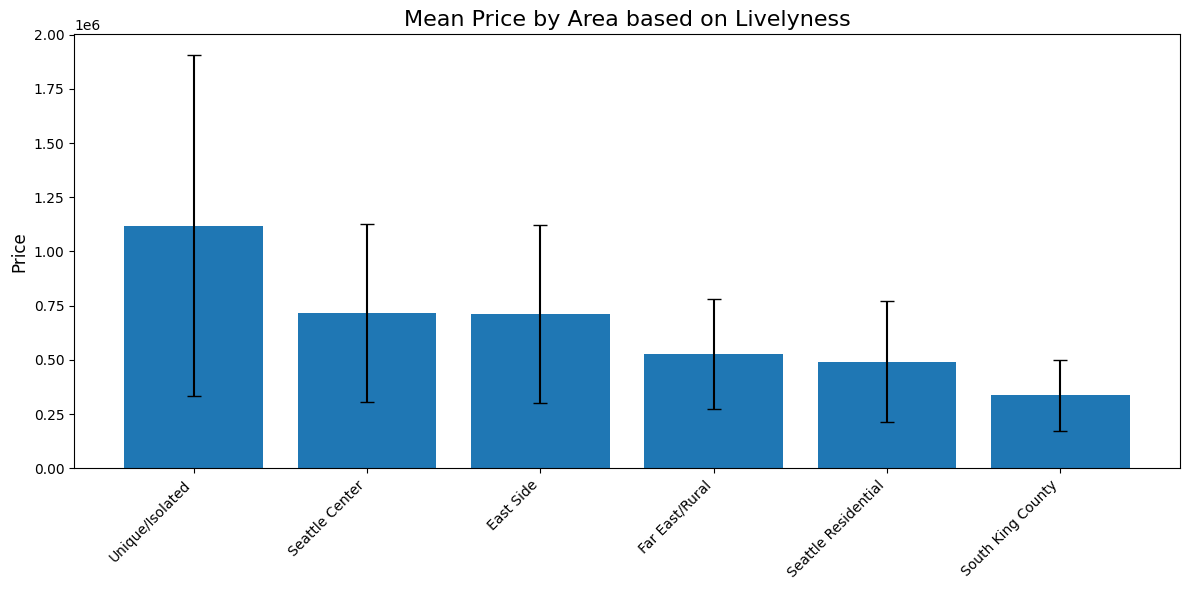

In [73]:
# Plot a bar chart with error bars for standard deviation
plt.figure(figsize=(12, 6))
bars = plt.bar(livelyness_stats['livelyness'], livelyness_stats['mean'], yerr=livelyness_stats['std'], capsize=5)

plt.title('Mean Price by Area based on Livelyness', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

#Format x-axis labels to show prices in millions




1. House prices are higher in lively and central neighborhoods in King County compared to less lively neighborhoods.

yes, house prices are higher in lively neighborhoods like the Seattle Center, however, isolated areas like islands and wealthy aereas like Medina (Isolated Aereas) are even more expensive.
Prices in east side of seattle, which is a mix of urban and suburban and fiendly friendly are similar price. However, seattle residential is also lively, close to downtown Seattle and even cheaper than in the center. 
mean of Seattle Residential lays about 50000 USD below average.

- https://www.niche.com/places-to-live/search/best-neighborhoods/c/king-county-wa/?bars=careALot&coffeeShops=careALot&parks=careALot&restaurants=careALot 
- looked for vibrant areas and which zip code they have:
    - vibrant areas are areas with social scene, dining options, nightlife, central
    - less lively, or more suborban: 
        family-oriented and quiet, suburban
- sorted my data based on ip codes




Hypothesis 2

Houses in central areas have a higher average 'grade' and 'condition' score compared to houses in less central locations.

- also want to look if overall the price range has an effect on grade and condition
- look at price range of all houses
- what is the middle price range? 
- Make average grade and condition score of all aereas and compare

Lively Areas: Seattle Center, Seattle Residential
nonlively: South King County, Far East Rural Aereas



In [78]:
df_eda['condition'].dtype

dtype('int64')

In [80]:
df_eda[['price']].describe()

,price
count,"21,597.00"
mean,"540,296.57"
std,"367,368.14"
min,"78,000.00"
25%,"322,000.00"
50%,"450,000.00"
75%,"645,000.00"
max,"7,700,000.00"


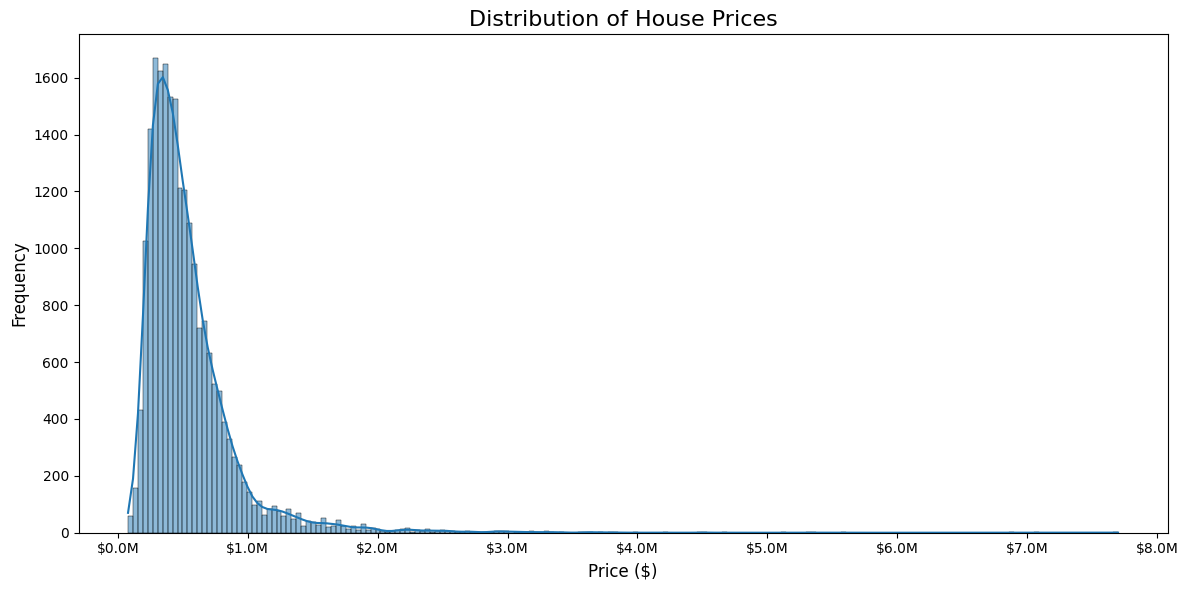

In [84]:
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_eda, x='price', bins=200, kde=True)

# Customize the plot
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Format x-axis labels to show prices in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Show the plot
plt.tight_layout()
plt.show()

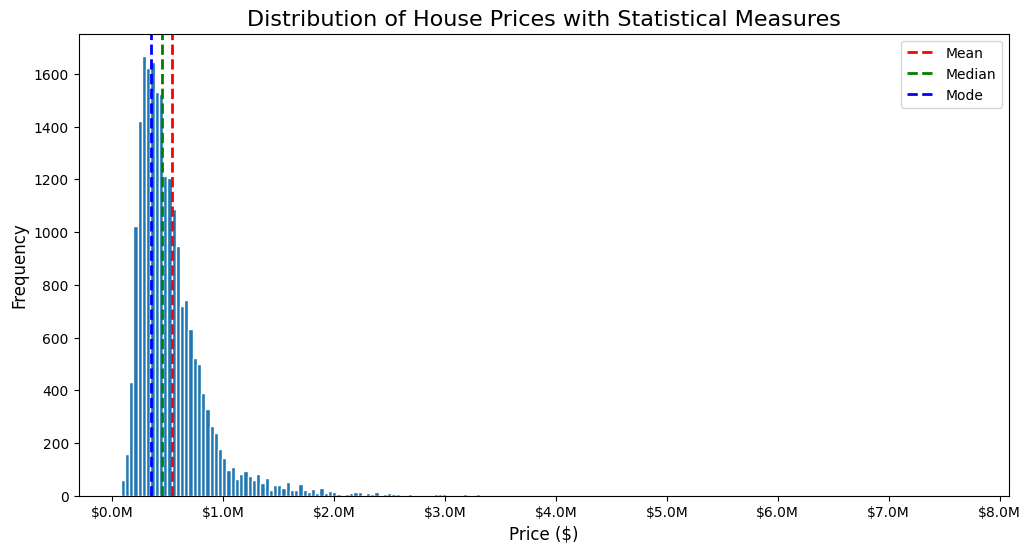

In [87]:
# Create the histogram
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df_eda['price'], bins=200, edgecolor='white')

# Calculate mean, median, and mode
mean_price = df_eda['price'].mean()
median_price = df_eda['price'].median()
mode_price = df_eda['price'].mode().iloc[0]

# Add vertical lines for mean, median, and mode
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_price, color='blue', linestyle='dashed', linewidth=2, label='Mode')

# Customize the plot
plt.title('Distribution of House Prices with Statistical Measures', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Format x-axis labels to show prices in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

Now I want to define the middle price range based on the data I have. I want to use the interquartile range, as it encloses 50% of the data. Also make low price range below that and high price range above that. Add these numbers to the data frame.

low price range: <322,000.00

middle price range: 322,000.00 - 450,000.00

high price range: >450,000.00

In [94]:
#make new column price range
# Define the bins for price ranges
bins = [0, 322000, 450000, float('inf')]

# Define the labels for each bin
labels = ['low', 'middle', 'high']

# Create a new column with the price range categories
df_eda['price_range'] = pd.cut(df_eda['price'], bins=bins, labels=labels, include_lowest=True)


In [107]:
df_eda.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_sold',
       'livelyness', 'price_range'],
      dtype='object')

In [112]:
# Group by 'price_range' to calculate mean and standard deviation of 'grade'
df_grade = df_eda.groupby('price_range')['grade'].describe()


In [113]:
df_grade.head()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
low,"5,406.00",6.81,0.73,3.00,6.00,7.00,7.00,10.00
middle,"5,445.00",7.29,0.75,4.00,7.00,7.00,8.00,11.00
high,"10,746.00",8.27,1.19,5.00,7.00,8.00,9.00,13.00


In [114]:
# Group by 'price_range' to calculate mean and standard deviation of 'condition'
df_condition = df_eda.groupby('price_range')['condition'].describe()

In [115]:
df_condition.head()

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
low,"5,406.00",3.41,0.66,1.00,3.00,3.00,4.00,5.00
middle,"5,445.00",3.36,0.61,1.00,3.00,3.00,4.00,5.00
high,"10,746.00",3.43,0.66,1.00,3.00,3.00,4.00,5.00


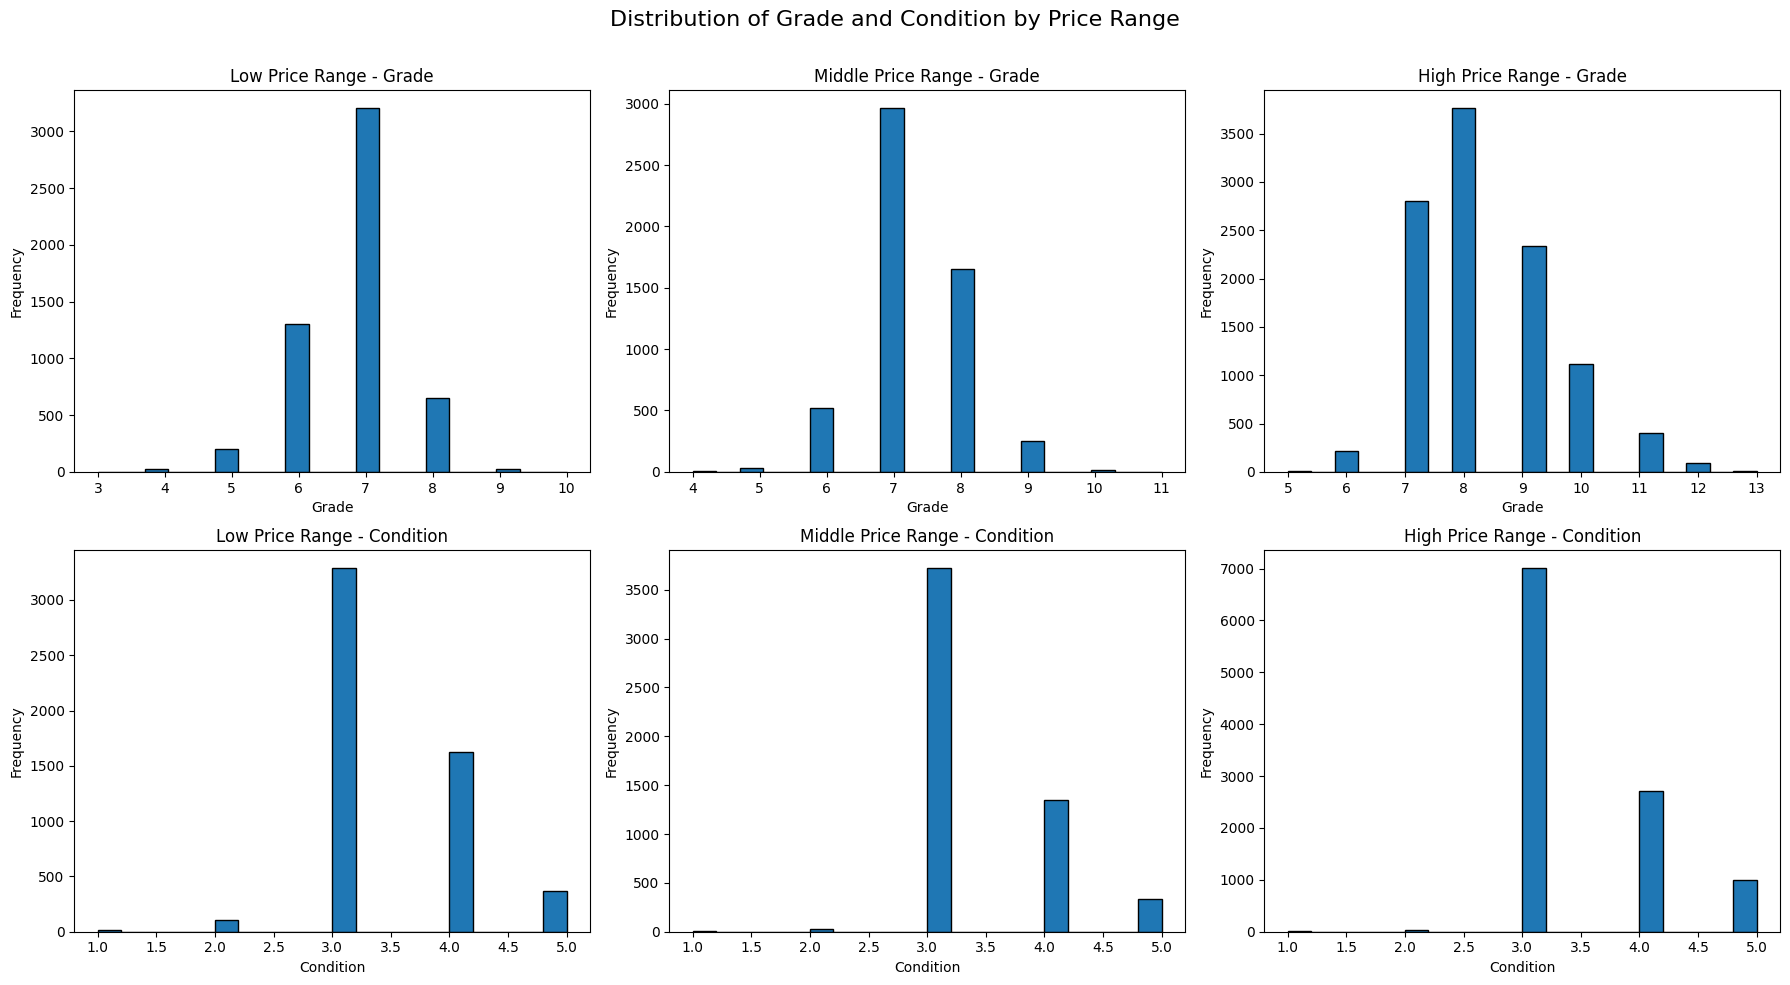

In [118]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Grade and Condition by Price Range', fontsize=16)

price_ranges = ['low', 'middle', 'high']
columns = ['grade', 'condition']

for j, column in enumerate(columns):
    for i, price_range in enumerate(price_ranges):
        data = df_eda[df_eda['price_range'] == price_range][column]
        axes[j, i].hist(data, bins=20, edgecolor='black')
        axes[j, i].set_title(f'{price_range.capitalize()} Price Range - {column.capitalize()}')
        axes[j, i].set_xlabel(column.capitalize())
        axes[j, i].set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Adjust to prevent title overlap
plt.show()


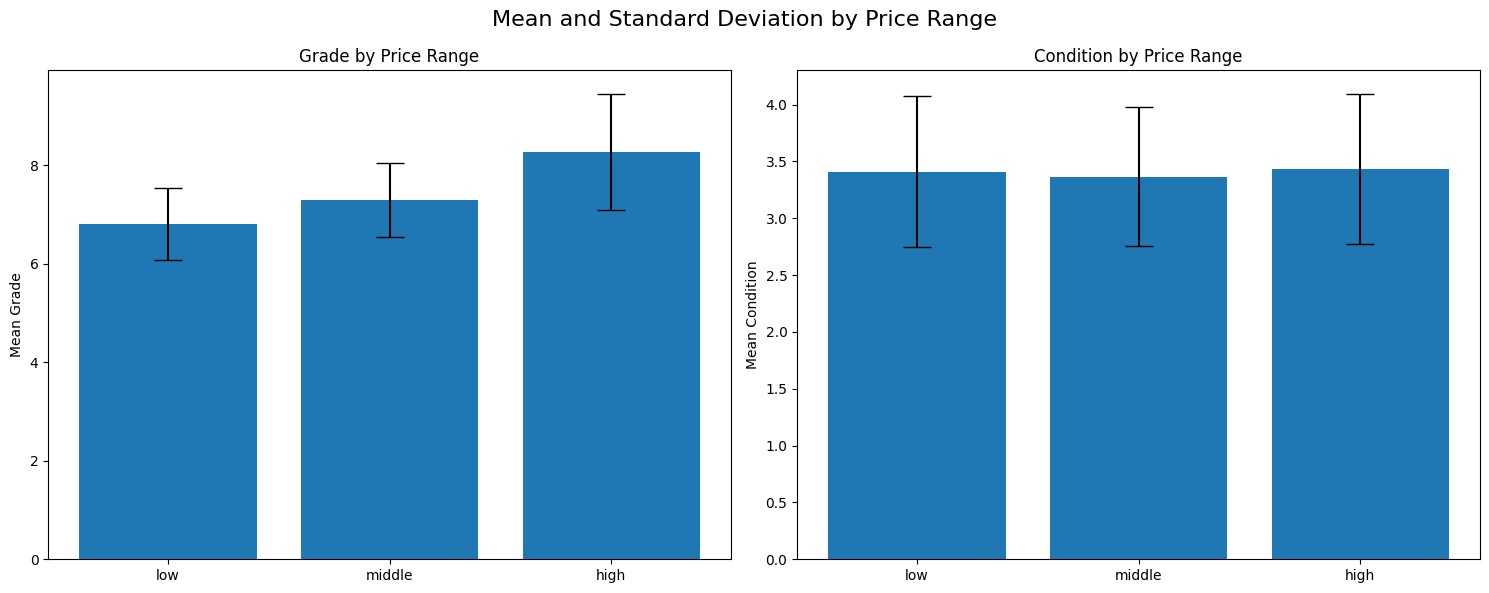

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Mean and Standard Deviation by Price Range', fontsize=16)

# Variables to plot
columns = ['grade', 'condition']
price_ranges = ['low', 'middle', 'high']

# Plot for Grade
means_grade = [df_eda[df_eda['price_range'] == pr]['grade'].mean() for pr in price_ranges]
stds_grade = [df_eda[df_eda['price_range'] == pr]['grade'].std() for pr in price_ranges]

ax1.bar(price_ranges, means_grade, yerr=stds_grade, capsize=10)
ax1.set_title('Grade by Price Range')
ax1.set_ylabel('Mean Grade')

# Plot for Condition
means_condition = [df_eda[df_eda['price_range'] == pr]['condition'].mean() for pr in price_ranges]
stds_condition = [df_eda[df_eda['price_range'] == pr]['condition'].std() for pr in price_ranges]

ax2.bar(price_ranges, means_condition, yerr=stds_condition, capsize=10)
ax2.set_title('Condition by Price Range')
ax2.set_ylabel('Mean Condition')

plt.tight_layout()
plt.show()

In [122]:
df_eda['livelyness'].unique()

array(['Seattle Residential', 'East Side', 'Far East/Rural',
       'South King County', 'Seattle Center', 'Unique/Isolated'],
      dtype=object)

Now create a new row for lively and quiet, and calculate mean for grade and condition

In [132]:
# Create a new column for the lively/quiet grouping
df_eda['region_type'] = df_eda['livelyness'].map({
    'Seattle Center': 'Lively',
    'Seattle Residential': 'Lively',
    'South King County': 'Quiet',
    'Far East/Rural': 'Quiet',
})



In [134]:
df_eda.groupby('region_type')[['grade', 'condition']].describe()

grade                                     condition            \
               count mean  std  min  25%  50%  75%   max     count mean  std   
region_type                                                                    
Lively      7,689.00 7.40 1.01 4.00 7.00 7.00 8.00 13.00  7,689.00 3.45 0.71   
Quiet       8,490.00 7.50 1.11 3.00 7.00 7.00 8.00 13.00  8,490.00 3.37 0.61   

                                      
             min  25%  50%  75%  max  
region_type                           
Lively      1.00 3.00 3.00 4.00 5.00  
Quiet       1.00 3.00 3.00 4.00 5.00

Not sorted by Lively and Quiet

In [135]:
df_eda.groupby('livelyness')[['grade', 'condition']].describe()

grade                                      condition  \
                       count mean  std  min  25%  50%   75%   max     count   
livelyness                                                                    
East Side           4,969.00 8.24 1.24 4.00 7.00 8.00  9.00 13.00  4,969.00   
Far East/Rural      2,129.00 7.87 1.29 3.00 7.00 8.00  9.00 12.00  2,129.00   
Seattle Center      2,636.00 7.68 1.00 5.00 7.00 8.00  8.00 13.00  2,636.00   
Seattle Residential 5,053.00 7.26 0.98 4.00 7.00 7.00  8.00 13.00  5,053.00   
South King County   6,361.00 7.38 1.02 4.00 7.00 7.00  8.00 13.00  6,361.00   
Unique/Isolated       449.00 8.59 1.53 5.00 8.00 9.00 10.00 13.00    449.00   

                                                        
                    mean  std  min  25%  50%  75%  max  
livelyness                                              
East Side           3.39 0.61 1.00 3.00 3.00 4.00 5.00  
Far East/Rural      3.24 0.52 1.00 3.00 3.00 3.00 5.00  
Seattle Center      3.47 0.73 1.00 3.00 3.00 4.00 5.00  
Seattle Residential 3.44 0.70 1.00 3.00 3.00 4.00 5.00  
South King County   3.41 0.63 1.00 3.00 3.00 4.00 5.00  
Unique/Isolated     3.73 0.71 2.00 3.00 4.00 4.00 5.00

[Text(0, 0, 'Seattle Center'),
 Text(1, 0, 'Seattle Residential'),
 Text(2, 0, 'East Side'),
 Text(3, 0, 'South King County'),
 Text(4, 0, 'Far East/Rural'),
 Text(5, 0, 'Unique/Isolated')]

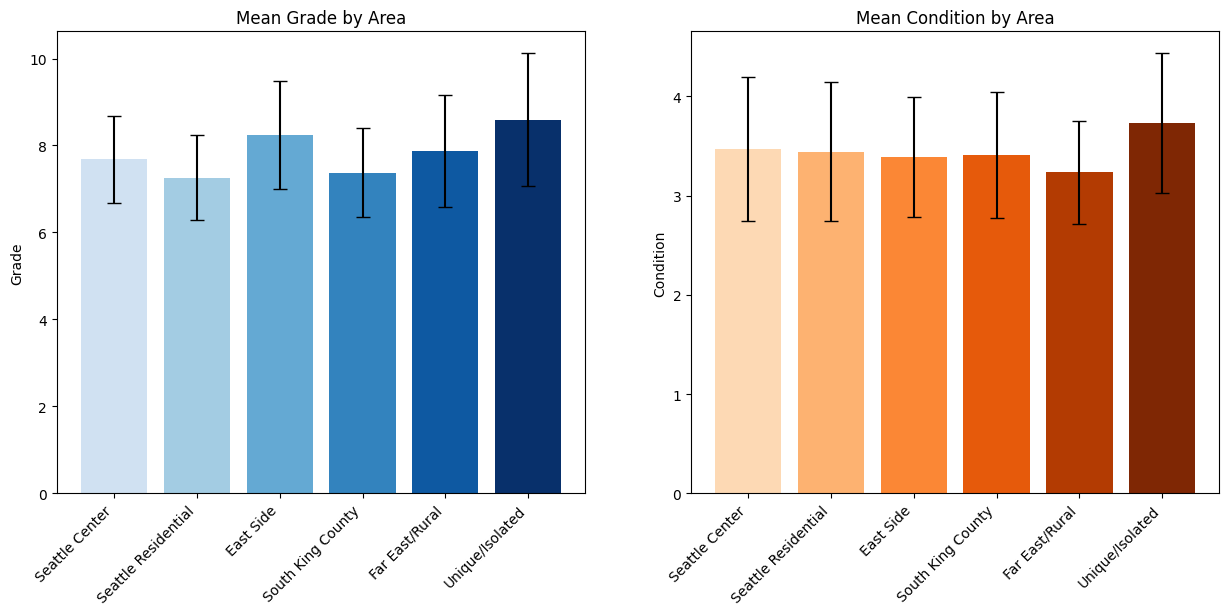

In [139]:
from matplotlib import cm

categories = ['Seattle Center', 'Seattle Residential', 'East Side', 'South King County', 'Far East/Rural', 'Unique/Isolated']

# Generate a gradient of colors using a colormap with adjusted color strength
cmap_grade = cm.get_cmap('Blues')
grade_colors = [cmap_grade(0.2 + 0.8 * (i / (len(categories) - 1))) for i in range(len(categories))]

cmap_condition = cm.get_cmap('Oranges')
condition_colors = [cmap_condition(0.2 + 0.8 * (i / (len(categories) - 1))) for i in range(len(categories))]

# Calculate means and standard deviations
grade_means = [df_eda[df_eda['livelyness'] == cat]['grade'].mean() for cat in categories]
grade_stds = [df_eda[df_eda['livelyness'] == cat]['grade'].std() for cat in categories]
condition_means = [df_eda[df_eda['livelyness'] == cat]['condition'].mean() for cat in categories]
condition_stds = [df_eda[df_eda['livelyness'] == cat]['condition'].std() for cat in categories]

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot grade with gradient colors
x = np.arange(len(categories))
ax1.bar(x, grade_means, yerr=grade_stds, capsize=5, color=grade_colors)
ax1.set_title('Mean Grade by Area')
ax1.set_ylabel('Grade')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Plot condition with gradient colors
ax2.bar(x, condition_means, yerr=condition_stds, capsize=5, color=condition_colors)
ax2.set_title('Mean Condition by Area')
ax2.set_ylabel('Condition')
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=45, ha='right')


Hypothesis 2

Houses in central areas have a higher average 'grade' and 'condition' score compared to houses in less central locations.


- no, overall especially the Unique/Isolated areas have a better grade but overall quite similar.
- Houses that are more expensive have a higher grade, and especially very expensive ones are in unique/isolated aereas


3. The best time to buy a house within a year is winter, due lower competition and prices
- make an overview of the months and then show the prices for each month
